In [ ]:
import pandas as pd
original = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/데이터 전처리 최종.xlsx')
df= original.copy()

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df

,item,url,artist,discount_price,price,is_sold_out,ds,vendor,is_autograph,avg_review_value,number_of_questions,number_of_reviews,presale,is_event,category,year,month,type,count,artist_isna
0,TWICE 11th MINI ALBUM BETWEEN 1&2,https://en.thejypshop.com/product/twice-11th-m...,TWICE,18.55,22.90,False,2022-11-14,jypshop,NaN,NaN,NaN,NaN,NaN,False,ALBUM,2022,11,Mini,449,False
1,1st Mini Album IM NAYEON,https://en.thejypshop.com/product/1st-mini-alb...,NAYEON,17.82,22.00,False,2022-11-14,jypshop,NaN,NaN,NaN,NaN,NaN,False,ALBUM,2022,11,Mini,8,False
2,TWICE 1st Mini Album The Story Begins,https://en.thejypshop.com/product/twice-1st-mi...,TWICE,11.91,14.70,False,2022-11-14,jypshop,NaN,NaN,NaN,NaN,NaN,False,ALBUM,2022,11,Mini,449,False
3,TWICE 3rd Mini Album TWICEcoaster : LANE 1,https://en.thejypshop.com/product/twice-3rd-mi...,TWICE,12.64,15.60,False,2022-11-14,jypshop,NaN,NaN,NaN,NaN,NaN,False,ALBUM,2022,11,Mini,449,False
4,Special Album TWICEcoaster : LANE 2,https://en.thejypshop.com/product/special-albu...,TWICE,14.09,17.40,False,2022-11-14,jypshop,NaN,NaN,NaN,NaN,NaN,False,ALBUM,2022,11,Special,449,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22173,"SEVENTEEN - ""THE NAME ;17"" PHOTOBOOK",https://www.kpopstoreinusa.com/products/sevent...,SEVENTEEN,NaN,65.99,False,2022-11-14,kpopstoreinusa,NaN,NaN,NaN,NaN,1.0,False,ect,2022,11,PHOTO BOOK,311,False
22174,WONHO - Bittersweet SET,https://www.kpopstoreinusa.com/products/wonho-...,MONSTA X,NaN,62.99,True,2022-11-14,kpopstoreinusa,NaN,NaN,NaN,NaN,1.0,False,ect,2022,11,NaN,446,False
22175,WONHO - Bittersweet - VER. 1 (GREEN),https://www.kpopstoreinusa.com/products/wonho-...,MONSTA X,NaN,21.99,False,2022-11-14,kpopstoreinusa,NaN,NaN,NaN,NaN,1.0,False,ect,2022,11,NaN,446,False
22176,BLACKPINK - BORN PINK (2nd Album) - LIMITED VI...,https://www.kpopstoreinusa.com/products/blackp...,BLACKPINK,NaN,69.99,False,2022-11-14,kpopstoreinusa,NaN,NaN,NaN,NaN,1.0,False,ALBUM,2022,11,LIMITED EDITION,192,False


In [ ]:
df.isna().sum()

item                       0
url                        0
artist                  3019
discount_price         17135
price                      0
is_sold_out                0
ds                         0
vendor                     0
is_autograph            9087
avg_review_value       11512
number_of_questions    11512
number_of_reviews      11512
presale                11836
is_event                   0
category                   0
year                       0
month                      0
type                   10462
count                      0
artist_isna                0
dtype: int64

In [ ]:
!pip install category_encoders 
!pip install eli5 
!pip install pdpbox

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.columns

Index(['item', 'url', 'artist', 'discount_price', 'price', 'is_sold_out', 'ds',
       'vendor', 'is_autograph', 'avg_review_value', 'number_of_questions',
       'number_of_reviews', 'presale', 'is_event', 'category', 'year', 'month',
       'type', 'count', 'artist_isna'],
      dtype='object')

In [ ]:
train, test = train_test_split(df)
train, val = train_test_split(train)

target = 'is_sold_out'
features = ['artist', 'discount_price', 'price',
       'vendor', 'is_autograph', 'presale', 'is_event', 'category','type', 'count', 'artist_isna']

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]
X_val,y_val = val[features], val[target]

In [ ]:
y_train = y_train.replace([True,False],['1','0']).astype('int')
y_test = y_test.replace([True,False],['1','0']).astype('int')
y_val = y_val.replace([True,False],['1','0']).astype('int')

In [ ]:
# 기준모델
from sklearn.metrics import accuracy_score

base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(3)} 입니다')

기준모델의 정확도는 0.745 입니다


In [ ]:
X_train

,artist,discount_price,price,vendor,is_autograph,presale,is_event,category,type,count,artist_isna
14420,D-CRUNCH,NaN,18.99,kpopstoreinusa,NaN,0.0,False,ALBUM,NaN,70,False
13870,DAY6,NaN,19.99,kpopstoreinusa,NaN,0.0,False,ALBUM,Mini,204,False
11536,SEVENTEEN,NaN,3.99,musicplaza,0.0,NaN,False,ALBUM,NaN,311,False
10272,하성운,NaN,5.99,musicplaza,0.0,NaN,False,ALBUM,Mini,43,False
14951,조명섭,NaN,18.99,kpopstoreinusa,NaN,0.0,False,ect,NaN,9,False
...,...,...,...,...,...,...,...,...,...,...,...
9368,NaN,NaN,5.99,musicplaza,0.0,NaN,False,ALBUM,Mini,0,True
2881,NCT DREAM,30.49,33.88,kpopalbums,0.0,NaN,False,ect,PHOTO BOOK,309,False
18699,TEEN TOP,NaN,17.99,kpopstoreinusa,NaN,0.0,False,ALBUM,NaN,99,False
18027,BTOB,NaN,55.99,kpopstoreinusa,1.0,0.0,False,ALBUM,NaN,142,False


In [ ]:
df['is_sold_out'].value_counts()

False    16483
True      5695
Name: is_sold_out, dtype: int64

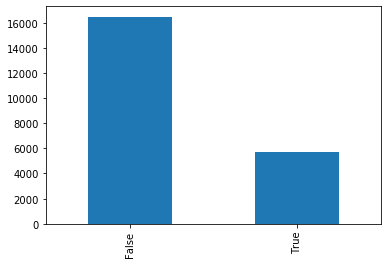

In [ ]:
df['is_sold_out'].value_counts().plot(kind = 'bar')

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, \
  accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report, recall_score, \
  precision_score, f1_score, roc_auc_score, roc_curve


# sp_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# pipe = make_pipeline(
#     OrdinalEncoder(),
#     XGBClassifier(
#         objective="binary:logistic",
#         n_jobs=-1,
#         eval_metric= "error",
#         random_state=42,
#         n_estimators= 300,
#         max_depth=6,
#         colsample_bytree = 1.0,
#         learning_rate = 0.8,
#         min_child_weight =1,
#         scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum()
#     ),
# )

# pipe.fit(X_train, y_train)

In [ ]:
# params = {
#     "xgbclassifier__n_estimators": [100,150],
#     # "xgbclassifier__max_depth": [16,17,18],
#     "xgbclassifier__min_child_weight": [1],
#     "xgbclassifier__colsample_bytree": [1.0],
#     "xgbclassifier__learning_rate": [0.8,0.9,1.0]
# }

In [ ]:
# # from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(pipe, param_grid=params, scoring="f1", cv=5, verbose=3)
# grid_search.fit(X_train, y_train)

In [ ]:
# print("최적 하이퍼파라미터: ", grid_search.best_params_)
# print("최적 f1 score: ", grid_search.best_score_)


NameError: ignored

In [ ]:
# from sklearn.model_selection import cross_val_score
# cv = cross_val_score(estimator= pipe,X= X_train, y= y_train, cv=10, n_jobs=-1,scoring = 'f1')
# round(cv.mean(),3)

In [ ]:
# from sklearn.model_selection import cross_val_score
# cv = cross_val_score(estimator= pipe,X= X_val, y= y_val, cv=10, n_jobs=-1,scoring = 'f1')
# round(cv.mean(),3)

In [ ]:
# train_xg = classification_report(y_train, pipe.predict(X_train), output_dict=True)
# test_xg = classification_report(y_val, pipe.predict(X_val), output_dict=True)

# print(f'훈련 정확도  : {train_xg["accuracy"]:.4f}')
# print(f'검증 정확도  : {test_xg["accuracy"]:.4f}')
# print(f'훈련 f1      : {train_xg["1"]["f1-score"]:.4f}')
# print(f'검증 f1      : {test_xg["1"]["f1-score"]:.4f}')


In [ ]:
# import matplotlib.pyplot as plt

# feature_importances = list(
#     zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)
# )
# feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# plt.figure(figsize=(10, 10), dpi=120)
# plt.barh(*list(zip(*feature_importances[::-1])))
# plt.axvline(0.015, color="red", linewidth=0.5)

In [ ]:
encoder = OrdinalEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_val_encode = encoder.transform(X_val)
X_test_encode = encoder.transform(X_test)

imputer = SimpleImputer(strategy = "constant", fill_value = 100)
X_train_imput = imputer.fit_transform(X_train_encode)
X_val_imput = imputer.transform(X_val_encode)
X_test_imput = imputer.transform(X_test_encode)


In [ ]:
# X_val_imput = pd.DataFrame(columns = X_val.columns, data = X_val_imput )

In [ ]:

# from imblearn.combine import SMOTEENN
# X_train_sampled, y_train_sampled = SMOTEENN(random_state=42).fit_resample(
#     X_train_imput, y_train
# )

In [ ]:
!pip3 install xgboost==1.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import warnings
warnings.filterwarnings(action='ignore')
     

In [ ]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)


In [ ]:
model = XGBClassifier(
        objective="binary:logistic",
        n_jobs=-1,
        eval_metric= "auc",
        random_state=42,
        n_estimators= 300,
        max_depth=7,
        colsample_bytree = 1.0,
        learning_rate = 0.8,
        min_child_weight =1,
        scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum()
    )

In [ ]:
watchlist = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

model.fit(
    X_train_encoded,
    y_train,
    eval_set = watchlist,
    early_stopping_rounds=100, 
)


[0]	validation_0-auc:0.84342	validation_1-auc:0.83323
[1]	validation_0-auc:0.86195	validation_1-auc:0.84934
[2]	validation_0-auc:0.87017	validation_1-auc:0.85485
[3]	validation_0-auc:0.88205	validation_1-auc:0.86358
[4]	validation_0-auc:0.89757	validation_1-auc:0.87782
[5]	validation_0-auc:0.90671	validation_1-auc:0.88354
[6]	validation_0-auc:0.90900	validation_1-auc:0.88636
[7]	validation_0-auc:0.91362	validation_1-auc:0.88849
[8]	validation_0-auc:0.91989	validation_1-auc:0.89160
[9]	validation_0-auc:0.92305	validation_1-auc:0.89316
[10]	validation_0-auc:0.92691	validation_1-auc:0.89412
[11]	validation_0-auc:0.93373	validation_1-auc:0.89647
[12]	validation_0-auc:0.94084	validation_1-auc:0.90078
[13]	validation_0-auc:0.94153	validation_1-auc:0.90156
[14]	validation_0-auc:0.94592	validation_1-auc:0.90532
[15]	validation_0-auc:0.95309	validation_1-auc:0.90976
[16]	validation_0-auc:0.95544	validation_1-auc:0.91192
[17]	validation_0-auc:0.95828	validation_1-auc:0.91406
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.8, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [ ]:
model.best_iteration

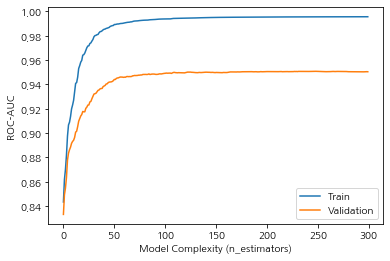

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

results = model.evals_result()
train_error = results["validation_0"]["auc"]
val_error = results["validation_1"]["auc"]

plt.plot(train_error, label="Train")
plt.plot(val_error, label="Validation")
plt.ylabel("ROC-AUC")
plt.xlabel("Model Complexity (n_estimators)")
plt.legend()

In [ ]:
model.predict(X_val_encoded).sum()

1218

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

def plot_confusion_matrix(model, X_val_encoded, y_val):
        y_pred = model.predict(X_val_encoded)
        cm = confusion_matrix(y_val, y_pred)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot(cmap='Blues')
        
        plt.show()
     

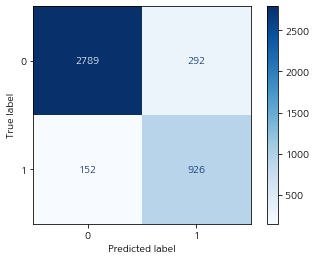

In [ ]:
plot_confusion_matrix(model, X_val_encoded, y_val)

In [ ]:
from sklearn.metrics import classification_report

print("검증 정확도", model.score(X_train_encoded, y_train))

print(
    classification_report(
        y_train, model.predict(X_train_encoded)
    )
)

검증 정확도 0.9554272887606221
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      9299
           1       0.87      0.97      0.92      3175

    accuracy                           0.96     12474
   macro avg       0.93      0.96      0.94     12474
weighted avg       0.96      0.96      0.96     12474



In [ ]:
train_xg = classification_report(y_train, model.predict(X_train_encoded), output_dict=True)
test_xg = classification_report(y_val, model.predict(X_val_encoded), output_dict=True)

print(f'훈련 정확도  : {train_xg["accuracy"]:.4f}')
print(f'검증 정확도  : {test_xg["accuracy"]:.4f}')
print(f'훈련 f1      : {train_xg["1"]["f1-score"]:.4f}')
print(f'검증 f1      : {test_xg["1"]["f1-score"]:.4f}')

훈련 정확도  : 0.9554
검증 정확도  : 0.8932
훈련 f1      : 0.9171
검증 f1      : 0.8066


In [ ]:
X_test_encoded = encoder.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report

print("테스트 정확도", model.score(X_test_encoded, y_test))

print(
    classification_report(
        y_test, model.predict(X_test_encoded)
    )
)

NameError: ignored

In [ ]:
# cw = (y_train == 0).sum() / (y_train == 1).sum()

model = RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        n_estimators= 500,
        max_depth=25,
        min_samples_leaf = 1,
        min_samples_split = 2,
        max_features=5,
        class_weight= "balanced"
    )

model.fit(X_train_imput, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25, max_features=5,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
train_xg = classification_report(y_train, model.predict(X_train_imput), output_dict=True)
test_xg = classification_report(y_val, model.predict(X_val_imput), output_dict=True)

print(f'훈련 정확도  : {train_xg["accuracy"]:.4f}')
print(f'검증 정확도  : {test_xg["accuracy"]:.4f}')
print(f'훈련 f1      : {train_xg["1"]["f1-score"]:.4f}')
print(f'검증 f1      : {test_xg["1"]["f1-score"]:.4f}')

훈련 정확도  : 0.9600
검증 정확도  : 0.8978
훈련 f1      : 0.9241
검증 f1      : 0.8095


In [ ]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(estimator= model,X= X_val_encode, y= y_val, cv=10, n_jobs=-1,scoring = 'f1')
round(cv.mean(),3)

nan

In [ ]:
from sklearn.metrics import classification_report

print("테스트 정확도", model.score(X_train_imput, y_train))

print(
    classification_report(y_train, model.predict(X_train_imput)
    )
)

테스트 정확도 0.9599967933301267
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      9299
           1       0.89      0.96      0.92      3175

    accuracy                           0.96     12474
   macro avg       0.94      0.96      0.95     12474
weighted avg       0.96      0.96      0.96     12474



In [ ]:

from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [260,280,300],
           'max_depth' : [23,24],
           'min_samples_leaf' : [1],
           'min_samples_split' : [2,3]
            }


In [ ]:
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv = GridSearchCV(model, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train_encode, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
plot_confusion_matrix(model, X_val_encode, y_val)

In [ ]:

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps["xgbclassifier"],  # model
    scoring="f1",  # metric
    n_iter=5,  # 다른 random seed를 사용하여 10번 반복
    random_state=42,
)

# 스코어를 다시 계산합니다.
permuter.fit(X_val_encoded, y_val)

In [ ]:
train_Before = classification_report(y_train, model.predict(X_train_encoded), output_dict=True)
val_Before = classification_report(y_val, model.predict(X_val_encoded), output_dict=True)

# Importance Table
step_model = model
step_enc = encoder
encoded_columns = X_val_encoded.columns
importances_table = pd.DataFrame({'Importances':step_model.feature_importances_}, index=encoded_columns).sort_values(by='Importances', ascending=False)

In [ ]:
# Importances Graph
fig, ax = plt.subplots(figsize = (12,8))
fig.suptitle('Importances by Features', fontsize=28, fontweight = 'bold')

importances_top = importances_table[:30] # feature 갯수 선택

sns.barplot(data = importances_top, x = 'Importances', y = importances_top.index)
plt.axvline(0.015, color="red", linewidth=1.5)

plt.xlabel('Importances', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


print(classification_report(y_test, model.predict(X_test_encoded)))

plot_confusion_matrix(pipe, X_test_encoded, y_test, cmap=plt.cm.Reds)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
y_pred = model.predict(X_test_encoded)

In [ ]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold = 0.478)
proba_1 = model.predict_proba(X_test_encoded)[:,1].reshape(-1,1)
custom_pred = binarizer.fit_transform(proba_1)


In [ ]:
recall=recall_score(y_test, model.predict(X_test_encoded))
acc=accuracy_score(y_test, model.predict(X_test_encoded))

print(f"재현율:{recall}, 정확도:{acc:.4f}")

In [ ]:
recall=recall_score(y_test, custom_pred)
acc=accuracy_score(y_test, custom_pred)

print(f"재현율:{recall}, 정확도:{acc:.4f}")

In [ ]:
cm = confusion_matrix(y_test, custom_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
        
plt.show()

# pdp 모델해석


In [ ]:
target_feature = 'vendor'
mappings = encoder.mapping
print(mappings)

mapping_data = list(filter(lambda x: x["col"] == target_feature, mappings))
print(mapping_data)

# mapping은 pandas series 형태로 저장되어 있습니다. index가 원래 값이고, value가 인코딩된 수치형 값입니다.
maps = mapping_data[0]["mapping"]
print(type(maps))
print(maps)

[{'col': 'artist', 'mapping': D-CRUNCH                      1
DAY6                          2
SEVENTEEN                     3
하성운                           4
조명섭                           5
                           ... 
JOHN NOH & YEONG YEOL KO    507
The Quiett                  508
강승윤                         509
CNBlue                      510
Lee Hi                      511
Length: 511, dtype: int64, 'data_type': dtype('O')}, {'col': 'vendor', 'mapping': kpopstoreinusa    1
musicplaza        2
kpopalbums        3
jypshop           4
smglobalshop      5
NaN              -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'category', 'mapping': ALBUM                 1
ect                   2
Badge & Keyring       3
LIGHT STICK           4
SEASON’S GREETINGS    5
OST                   6
NaN                  -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'type', 'mapping': NaN                 1
Mini                2
PHOTO BOOK          3
single              4
KIHNO               5


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9434835b0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9434845b0>})

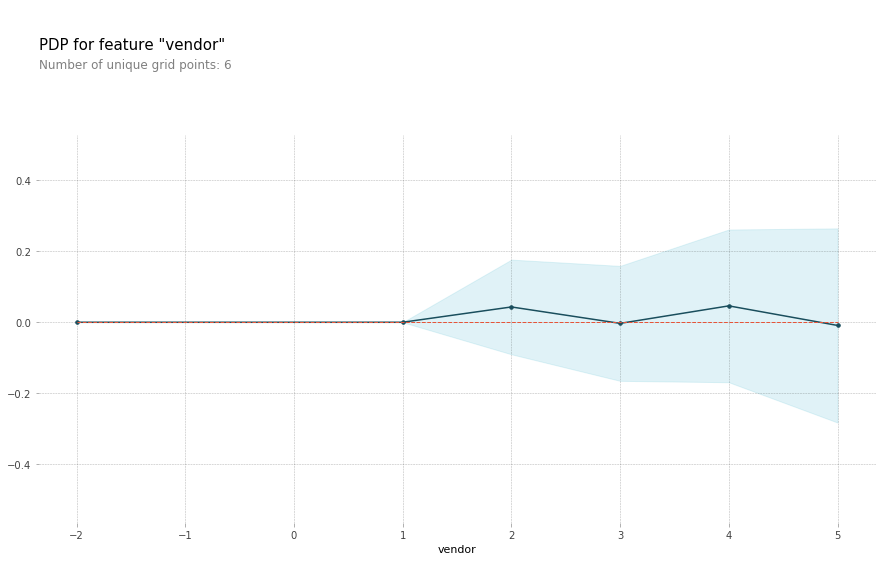

In [ ]:
# 우선 인코딩된 후의 값을 기준으로 PDP를 그려 봅시다.
from pdpbox.pdp import pdp_isolate, pdp_plot
pdp_dist = pdp_isolate(
    model=model,
    dataset=X_val_encoded,
    model_features=X_val.columns,
    feature=target_feature,
    cust_grid_points=[-2, 1, 2, 3, 4, 5],  # 특성값을 찍어 볼 지점을 직접 지정할 수 있습니다.
)
pdp_plot(pdp_dist, target_feature)  # 인코딩된 marital-status 값을 확인할 수 있습니다

In [ ]:
# 인코딩된 특성값과 원래 특성값을 리스트로 가져옵니다.
encoded_features = maps.values.tolist()
original_features = maps.index.tolist()
print(encoded_features, original_features)

[1, 2, 3, 4, 5, -2] ['kpopstoreinusa', 'musicplaza', 'kpopalbums', 'jypshop', 'smglobalshop', nan]


([<matplotlib.axis.XTick at 0x7fb941a7b0a0>,
 <a list of 6 Text xticklabel objects>)

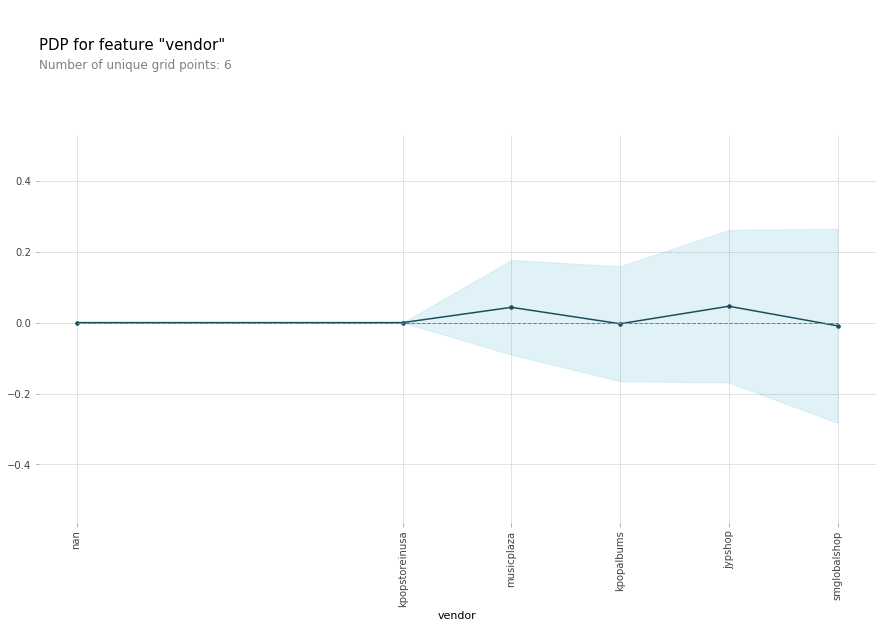

In [ ]:
pdp_plot(pdp_dist, target_feature)

# plot의 x축에 표시될 값을 encoded features에서 original features로 매핑해 줍니다.
plt.xticks(encoded_features, original_features, rotation=90)

In [ ]:
target_feature = 'type'

mapping_data = list(filter(lambda x: x["col"] == target_feature, mappings))
print(mapping_data)

# mapping은 pandas series 형태로 저장되어 있습니다. index가 원래 값이고, value가 인코딩된 수치형 값입니다.
maps = mapping_data[0]["mapping"]
print(type(maps))
print(maps)

[{'col': 'type', 'mapping': NaN                 1
Mini                2
PHOTO BOOK          3
single              4
KIHNO               5
DIGIPACK            6
LIMITED EDITION     7
Special             8
Repackage           9
OST                10
정규                 11
dtype: int64, 'data_type': dtype('O')}]
<class 'pandas.core.series.Series'>
NaN                 1
Mini                2
PHOTO BOOK          3
single              4
KIHNO               5
DIGIPACK            6
LIMITED EDITION     7
Special             8
Repackage           9
OST                10
정규                 11
dtype: int64


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb941a52430>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb941a701c0>})

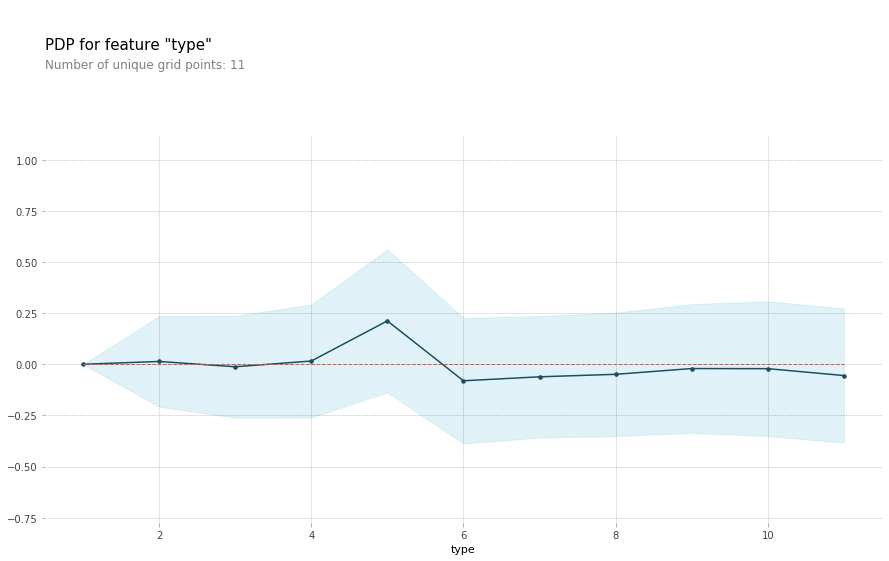

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
pdp_dist = pdp_isolate(
    model=model,
    dataset=X_val_encoded,
    model_features=X_val.columns,
    feature=target_feature,
    cust_grid_points=[1, 2, 3, 4, 5,6,7,8,9,10,11],  # 특성값을 찍어 볼 지점을 직접 지정할 수 있습니다.
)
pdp_plot(pdp_dist, target_feature)

In [ ]:
# #한글 폰트 설치
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [ ]:
#한글 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareL.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumGothicCoding = /usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
NanumGothicCoding = /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunpen = /us

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [nan, 'Mini', 'PHOTO BOOK', 'single', 'KIHNO', 'DIGIPACK', 'LIMITED EDITION', 'Special', 'Repackage', 'OST', '정규']


NameError: ignored

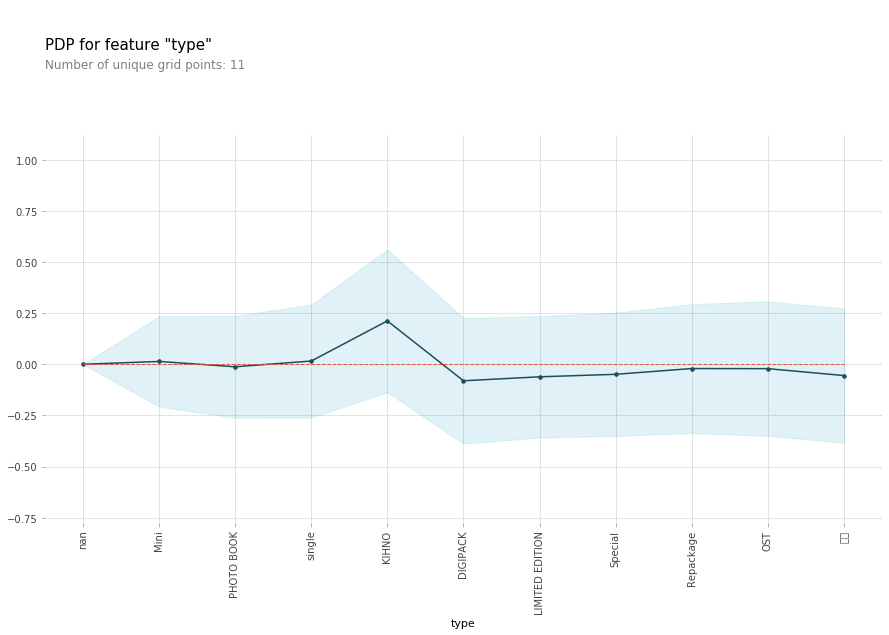

In [ ]:
# 인코딩된 특성값과 원래 특성값을 리스트로 가져옵니다.
encoded_features = maps.values.tolist()
original_features = maps.index.tolist()
print(encoded_features, original_features)

pdp_plot(pdp_dist, target_feature)

# plot의 x축에 표시될 값을 encoded features에서 original features로 매핑해 줍니다.
plt.xticks(encoded_features, original_features, rotation=90)
plt.rc('font', family=font_name)

In [ ]:
target_feature = 'category'

mapping_data = list(filter(lambda x: x["col"] == target_feature, mappings))
print(mapping_data)

# mapping은 pandas series 형태로 저장되어 있습니다. index가 원래 값이고, value가 인코딩된 수치형 값입니다.
maps = mapping_data[0]["mapping"]
print(type(maps))
print(maps)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
pdp_dist = pdp_isolate(
    model=model,
    dataset=X_val_encoded,
    model_features=X_val.columns,
    feature=target_feature,
    cust_grid_points=[1, 2, 3, 4, 5,6],  # 특성값을 찍어 볼 지점을 직접 지정할 수 있습니다.
)
pdp_plot(pdp_dist, target_feature)

In [ ]:
# 인코딩된 특성값과 원래 특성값을 리스트로 가져옵니다.
encoded_features = maps.values.tolist()
original_features = maps.index.tolist()
print(encoded_features, original_features)

pdp_plot(pdp_dist, target_feature)

# plot의 x축에 표시될 값을 encoded features에서 original features로 매핑해 줍니다.
plt.xticks(encoded_features, original_features, rotation=90)

In [ ]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 144

In [ ]:
X_val.columns

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = 'price'

isolated = pdp_isolate(
    model= model,
    dataset= X_val_encoded,
    model_features= X_val.columns,
    feature = target_feature,
    grid_type= "percentile",  # default = 'percentile', or 'equal'
    num_grid_points=15,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

In [ ]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

In [ ]:
X_val_imput = X_val_imput[['artist', 'discount_price', 'price', 'vendor', 'is_autograph',
       'presale', 'is_event', 'category', 'type', 'count', 'artist_isna']].astype('int')


In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = 'discount_price'

isolated = pdp_isolate(
    model= model,
    dataset= X_val_imput,
    model_features= X_val.columns,
    feature = target_feature,
    grid_type= "equal",  # default = 'percentile', or 'equal'
    num_grid_points=15,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

In [ ]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = 'count'

isolated = pdp_isolate(
    model= model,
    dataset= X_val_encoded,
    model_features= X_val.columns,
    feature = target_feature,
    grid_type= "percentile",  # default = 'percentile', or 'equal'
    num_grid_points=20,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

In [ ]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)